# KAGGLE COMPITITION 
# TITANIC: MACHINE LEARNING FROM DISASTER

* BY ASHISH H GARUD

In [1]:
# train                                                    test
# Xtrain----ytrain                                         Xtest----ytest
# Xtrain_train Xtrain_test----ytrain_train ytrain_test

In [2]:
# PYTHON LIBRARIES
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# 1. DATASET PREPRATION AND PREPROCESSING

# Data Collection

In [4]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [5]:
train.tail(4)
test.tail(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


* DATA FEATURES INFORMATION AND DESCRIPTION

In [6]:
train.shape
test.shape

(418, 11)

In [7]:
train.index
test.index

RangeIndex(start=0, stop=418, step=1)

In [8]:
train.columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.count()
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [10]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
train.describe()
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train.describe(include=['O'])
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Badman, Miss. Emily Louisa",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# -----------------------------------------

In [13]:
#titanic = pd.concat((train, test), axis = 0, ignore_index=True) 

In [14]:
#titanic.tail()

In [15]:
#titanic.set_index('PassengerId', inplace=True)

In [16]:
#titanic.shape

In [17]:
#titanic.index

In [18]:
#titanic.columns

In [19]:
#titanic.count()

In [20]:
#titanic.info()

In [21]:
#titanic.describe()

In [22]:
#titanic.describe(include=['O'])

# -----------------------------------------

* DATA RELATIONSHIP BETWEEN FEATURES AND TARGET FEATURE

 * Survival

In [23]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

In [24]:
survived_percentage = float(len(survived))/len(train)*100.0
not_survived_percentage = float(len(not_survived))/len(train)*100.0

   * Pclass vs. Survival

In [25]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [27]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


* Sex vs. Survival

In [28]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [30]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


* Embarked vs. Survived

In [31]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [33]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


* Pclass & Sex vs. Survival

In [34]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


* Pclass, Sex & Embarked vs. Survival

* Parch vs. Survival

In [35]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [37]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


* SibSp vs. Survival

In [38]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [39]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [40]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* Age vs. Survival

In [41]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [42]:
#train.groupby('Age').Survived.value_counts()

In [43]:
#train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()

# Data Visualisation - PRE

In [44]:
sns.set(style="darkgrid")

* Correlation Between Data Features

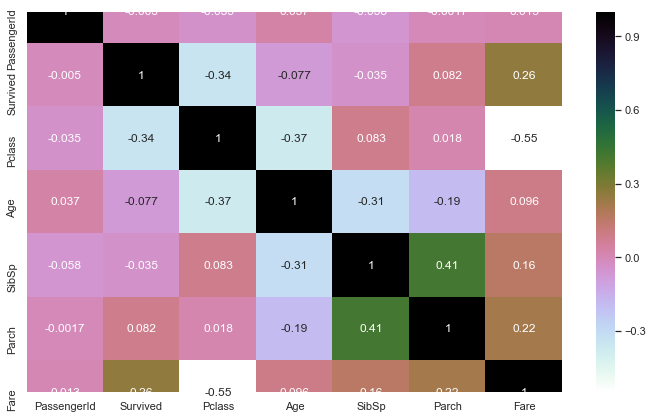

In [45]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(), annot=True, cmap='cubehelix_r')

* DATA FEATURES INFORMATION AND DESCRIPTION

* Data Feature Visualisation
  * Frequency Distrubution - Count Plot (Qualitative Variable), 
     * Histogram (DISTplot - hist + KDE) Plot (Quntitative Variable)
  * Joint Distribution of two variable - Scatter Plot (Quntitative Variable)

* 1. Count Plot (Qualitative Variable)

In [46]:
#for index,columns in enumerate(Xtrain):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.countplot(x=columns, data=train.drop(train['Survived']), palette = 'Set1') # y=ytrain,

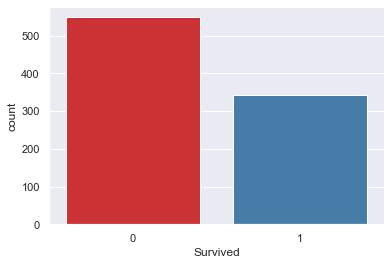

In [47]:
sns.countplot(train['Survived'], palette = 'Set1')

* 1a. Histogram (DISTplot - hist + KDE) Plot (Quntitative Variable) 

In [48]:
#sns.pairplot(train[['Age', 'Parch', 'Pclass', 'SibSp', 'Survived']], kind="reg")

In [49]:
#for index, columns in enumerate(Xtrain):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.distplot(columns, kde = False) #y=ytrain, 

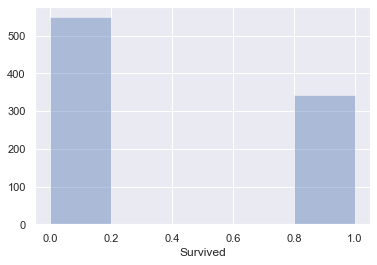

In [50]:
#sns.countplot(train['Survived'])
sns.distplot(train['Survived'], kde = False)

* Data Feature Visualisation
  * Descriptive Statistics - Box plot

In [51]:
#xx = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
#for index,columns in enumerate(xx):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.boxplot(x=train['Survived'], y=columns, data=xx, palette = 'Set1')

* Data Feature Visualisation
  * Central Tendency - Bar plot (quntitative variable)

In [52]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')

In [53]:
#for index,columns in enumerate(Xtrain):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.barplot(x=columns, y=ytrain, data=Xtrain, palette = 'Set1')

#xx = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
#for index,columns in enumerate(xx):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.barplot(x=train['Survived'], y=columns, data=xx, palette = 'Set1')

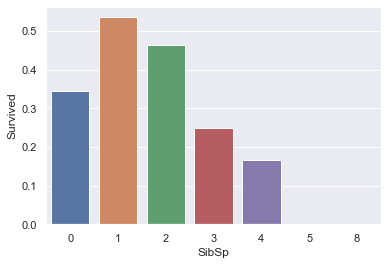

In [54]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train)

* Age vs. Survival

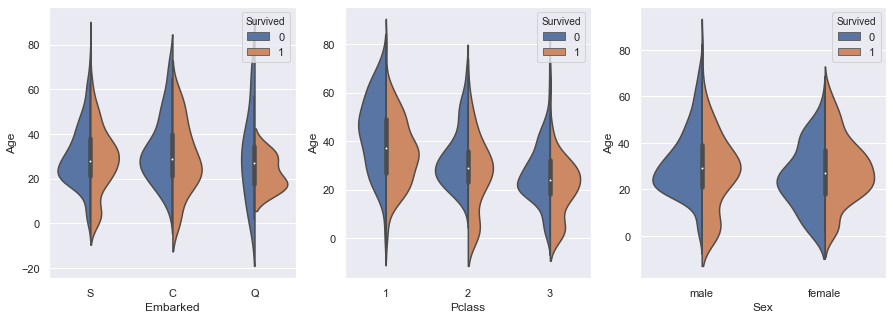

In [55]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

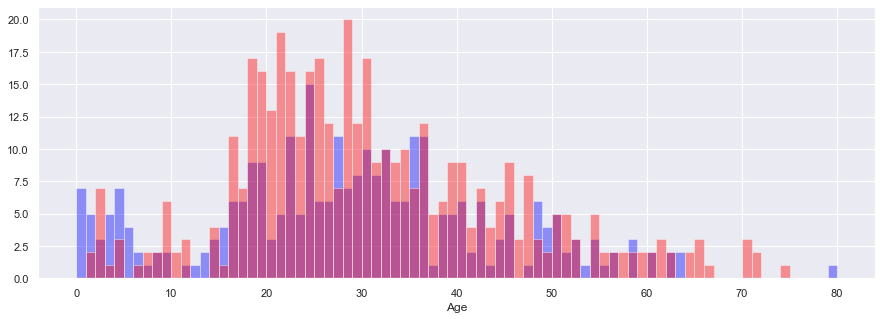

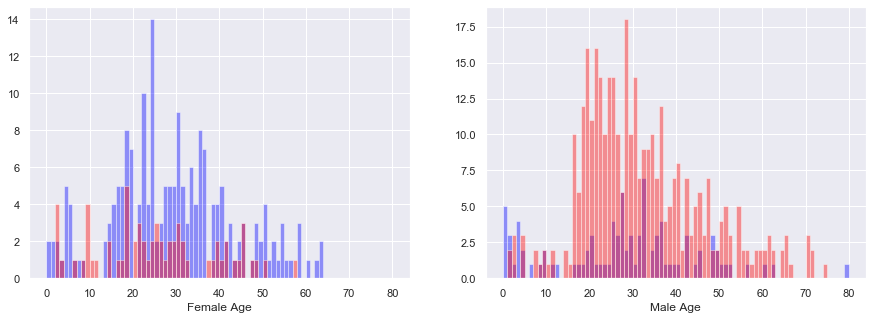

In [56]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

# Data Preprocessing

* DATA FEATURE SELECTION AND MISSING HANDLING

In [57]:
#train.isnull().sum()

In [58]:
#test.isnull().sum()

In [59]:
features_drop_train = ['PassengerId', 'Cabin', 'Name', 'Fare', 'Ticket']
features_drop_test = ['Cabin', 'Name', 'Fare', 'Ticket']
train.drop(features_drop_train, axis=1, inplace=True)
test.drop(features_drop_test, axis=1, inplace=True)
#train = train.drop(['PassengerId'], axis=1, inplace=True)
#test = test.drop(['PassengerId'], axis=1, inplace=True)

In [60]:
train.dropna(subset=['Embarked'], axis=0, how='any', inplace=True)
test.dropna(subset=['Embarked'], axis=0, how='any', inplace=True)

In [61]:
train.Age=train.Age.fillna(value=train.Age.mean())
test.Age=test.Age.fillna(value=train.Age.mean())
#train.Age=train.Age.fillna(value=train.Age.median())
#test.Age=test.Age.fillna(value=train.Age.median())

In [62]:
#train.isnull().sum()

In [63]:
#test.isnull().sum()

# --------------------------------

In [64]:
#titanic.isnull().tail()
#titanic.notnull().tail()

In [65]:
#titanic.isnull().sum()

In [66]:
#titanic.drop(['Cabin', 'Name', 'Fare', 'Ticket'], axis=1, inplace=True)
#titanic.shape


In [67]:
#titanic.dropna(subset=['Embarked', 'Fare'], how='any', inplace=True)
#titanic.dropna(subset=['Embarked'], how='any', inplace=True)
#titanic.shape

In [68]:
#titanic.Age=titanic.Age.fillna(value=train.Age.mean())

In [69]:
#titanic.isnull().sum()

In [70]:
#titanic.info()

In [71]:
#titanic.index

In [72]:
#titanic.columns

In [73]:
#titanic.describe()

In [74]:
#titanic.describe(include=['O'])

In [75]:
#titanic.tail()

# -----------------------------------------

* Converting Features - Categorical features into Numeric form

In [76]:
#survived = {0:'n', 1:'y'}
#ytrain = train['Survived'].map(survived)

In [77]:
genders = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(genders)
test['Sex'] = test['Sex'].map(genders)

In [78]:
ports = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(ports)
test['Embarked'] = test['Embarked'].map(ports)

In [79]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.642093,1,2,0
889,1,1,0,26.000000,0,0,1
890,0,3,0,32.000000,0,0,2


In [80]:
test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
413,1305,3,0,29.642093,0,0,0
414,1306,1,1,39.000000,0,0,1
415,1307,3,0,38.500000,0,0,0
416,1308,3,0,29.642093,0,0,0
417,1309,3,0,29.642093,1,1,1


# -----------------------------------------

In [81]:
# titanic = pd.concat((train, test), axis = 0, ignore_index=True) 

# -----------------------------------------

# Data Visualisation - AFTER 

In [82]:
sns.set(style="darkgrid")

* Correlation Between Data Features

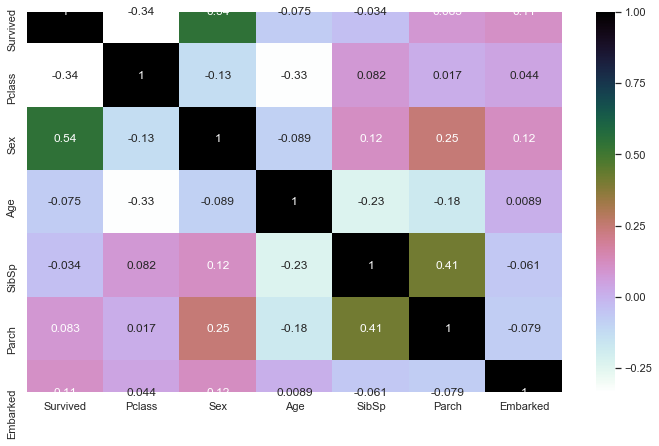

In [83]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(), annot=True, cmap='cubehelix_r')

* DATA FEATURES INFORMATION AND DESCRIPTION

* Data Feature Visualisation
  * Frequency Distrubution - Count Plot (Qualitative Variable), 
     * Histogram (DISTplot - hist + KDE) Plot (Quntitative Variable)
  * Joint Distribution of two variable - Scatter Plot (Quntitative Variable)

* 1. Count Plot (Qualitative Variable)

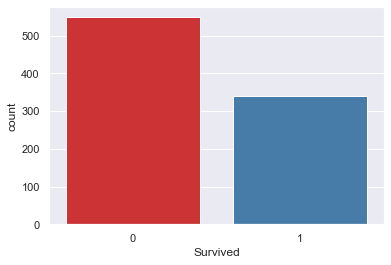

In [84]:
sns.countplot(train['Survived'], palette = 'Set1')

In [85]:
#for index,columns in enumerate(train):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.countplot(x=columns, data=train.drop(train['Survived']), palette = 'Set1') # y=ytrain,

* 1a. Histogram (DISTplot - hist + KDE) Plot (Quntitative Variable)

In [86]:
#sns.pairplot(train[['Age', 'Parch', 'Pclass', 'SibSp', 'Survived']], kind="reg")

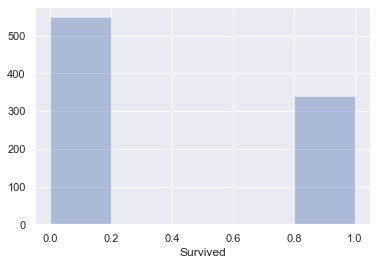

In [87]:
#sns.countplot(train['Survived'])
sns.distplot(train['Survived'], kde = False)

In [88]:
#for index,columns in enumerate(train):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.distplot(columns, kde = False) #y=ytrain,

* Data Feature Visualisation
  * Descriptive Statistics - Box plot

In [89]:
#for index,columns in enumerate(train):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.boxplot(x=columns, y=train['Survived'], data=train.drop(train['Survived']), palette = 'Set1')
    #sns.boxplot(x=train['Survived'], y=columns, data=train.drop(train['Survived']), palette = 'Set1')

* Data Feature Visualisation
  * Central Tendency - Bar plot (quntitative variable)

In [90]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')

In [91]:
#for index,columns in enumerate(Xtrain):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.barplot(x=columns, y=ytrain, data=Xtrain, palette = 'Set1')
 
#for index,columns in enumerate(train):
    #plt.figure(index)
    #plt.figure(figsize=(5,5))
    #sns.barplot(x=columns, y=train['Survived'], data=train.drop(train['Survived']), palette = 'Set1')
    #sns.barplot(x=train['Survived'], y=columns, data=train.drop(train['Survived']), palette = 'Set1')

# -----------------------------------------

* DATA RELATIONSHIP BETWEEN FEATURES AND TARGET FEATURE

* Pclass vs. Survival

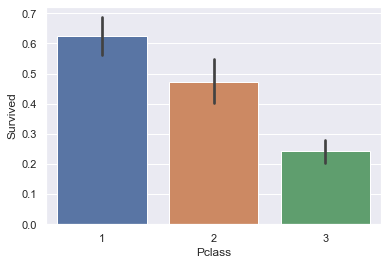

In [92]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=train)

* Sex vs. Survival

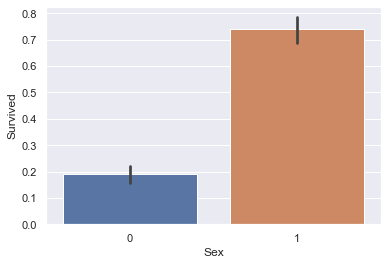

In [93]:
#train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=train)

* Embarked vs. Survived

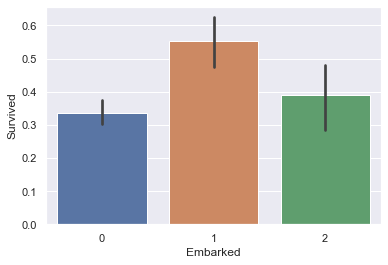

In [94]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=train)

* Pclass & Sex vs. Survival

Text(0, 0.5, 'Percentage')

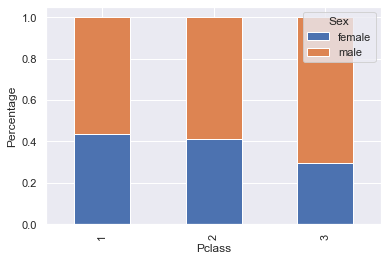

In [95]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

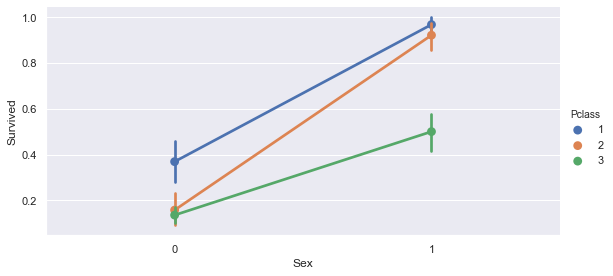

In [96]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

* Pclass, Sex & Embarked vs. Survival

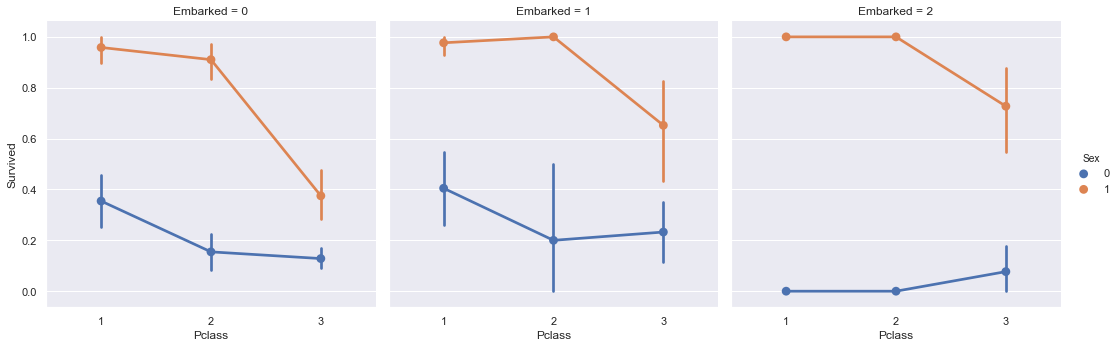

In [97]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

* Parch vs. Survival

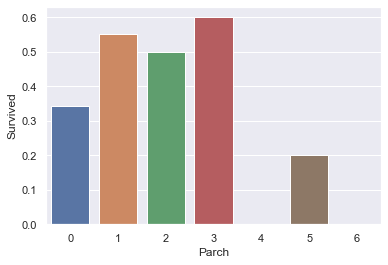

In [98]:
#train.groupby('Parch').Survived.mean().plot(kind='bar')
sns.barplot(x='Parch', y='Survived', ci=None, data=train)

* SibSp vs. Survival

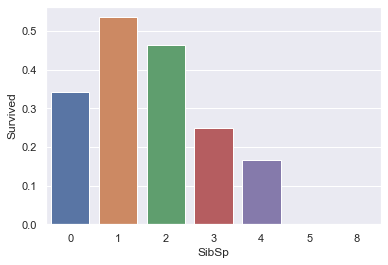

In [99]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train)

* Age vs. Survival

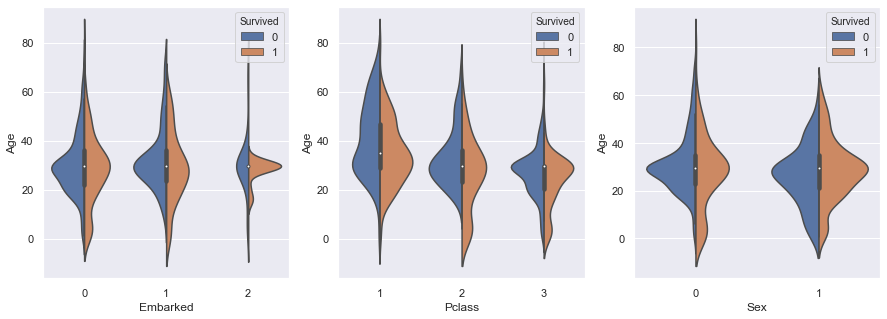

In [100]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

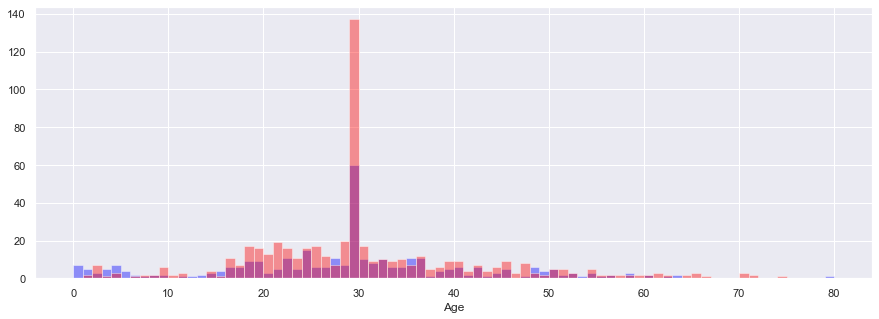

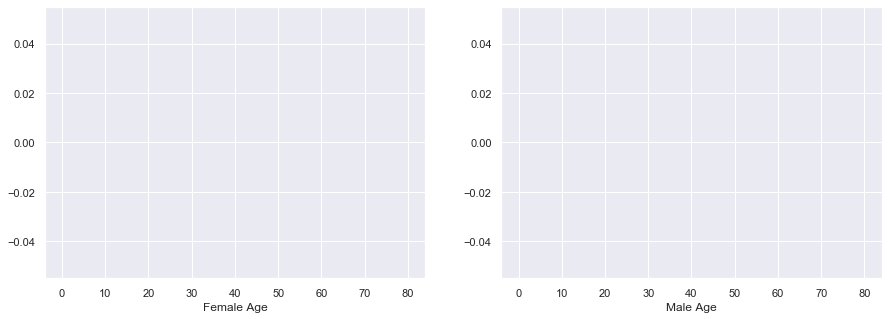

In [101]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

# Data Transformation

* Scaling
* Decomposition
  * PCA
*Aggregation

* PCA

In [102]:
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d

In [103]:
pca = PCA(n_components=3)
Xtrain = train.drop('Survived', axis=1)
Xtrain_pca = pca.fit_transform(Xtrain)
#Xtrain_pca = pca.fit_transform(train.drop('Survived', axis=1))


In [104]:
Xtrain_pca

array([[-7.65713958,  0.06313449, -0.65987168],
       [ 8.37455169,  0.48429713,  1.00765383],
       [-3.64250917, -0.66263378, -0.45151249],
       ...,
       [-0.04438514,  1.19354951, -0.29780069],
       [-3.59638295, -0.75366609,  1.2203347 ],
       [ 2.35873264, -0.71694322, -0.90224093]])

Text(0.5, 0.92, 'PCA Scatter Plot')

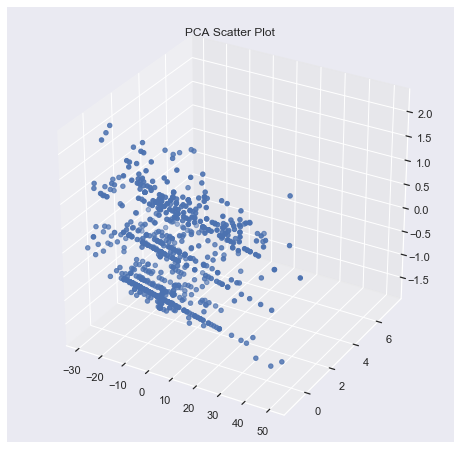

In [105]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

#ax.plot3D(Xtrain_pca[:,0],Xtrain_pca[:,1],Xtrain_pca[:,2], 'Grey')
ax.scatter3D(Xtrain_pca[:,0],Xtrain_pca[:,1],Xtrain_pca[:,2], cmap='Greens')

#plt.scatter(Xtrain_pca[:,0],Xtrain_pca[:,1],Xtrain_pca[:,2])
#plt.colorbar()
#plt.title('PCA Scatter Plot')

ax.set_title('PCA Scatter Plot')

# 2. DATASET SPLITING

* Training set -
* Validation set - used as a part of a training set & to tune the parameters
  * used for - parameter selection
* Test set - evaluating the performance of a trained model

In [106]:
from sklearn import model_selection

In [107]:
Xtrain = train.drop('Survived', axis=1)
ytrain = train['Survived']

Xtest = test.drop("PassengerId", axis=1)
#ytest

In [108]:
val_size = 0.2
seed = 7
#X_train, X_test, y_train, y_test = model_selection.train_test_split(Xtrain, ytrain, test_size = val_size, random_state = seed)
Xtrain_train, Xtrain_test, ytrain_train, ytrain_test = model_selection.train_test_split(Xtrain, ytrain, test_size = val_size, random_state = seed)
# train_Xtrain, test_Xtrain, train_ytrain, test_ytrain = model_selection.train_test_split(Xtrain, ytrain, test_size = val_size, random_state = seed)
# Xtrain_Xtrain, Xtest_Xtrain, ytrain_ytrain, ytest_ytrain = model_selection.train_test_split(Xtrain, ytrain, test_size = val_size, random_state = seed)

# 3. MODELING

* Model training
* Model evaluation and testing
  * Training and testing on the same data
  * Train/test split Dataset
    * Train/test split
    * Cross-validation
    * Leave One Out (LOO) Cross Validation
    * Repeated Random Test-Train Splits
  * PCA components
    * Pipelining
* Improving predictions with ensemble methods

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Model evaluation and testing

* Leave One Out (LOO) Cross Validation

In [110]:
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

y_pred_log_reg = clf.predict(Xtest)

acc_log_reg = round( clf.score(Xtrain, ytrain) * 100, 2)
print (str(acc_log_reg) + ' percent')

80.43 percent


In [111]:
from sklearn.model_selection import LeaveOneOut

In [112]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    loocv = model_selection.LeaveOneOut()
    cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv = loocv, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.797525 (0.401844)
KNN: 0.764904 (0.424059)
CART: 0.790776 (0.406755)
NB: 0.777278 (0.416073)
SVM: 0.803150 (0.397618)


In [113]:
LR = LogisticRegression()
fitting  = LR.fit(Xtrain, ytrain)
predictions = LR.predict(Xtest) 

In [114]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [115]:
df = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions}).set_index('PassengerId')

In [116]:
predictions = df.to_csv('submission00.csv')
#predictions = df.to_csv('submission03.csv')

In [117]:
#SVM = SVC()
#fitting  = SVM.fit(Xtrain, ytrain)
#predictions = SVM.predict(Xtest) 

In [118]:
#predictions

In [119]:
#df = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions}).set_index('PassengerId')

In [120]:
#predictions = df.to_csv('submission01.csv')
#predictions = df.to_csv('submission02.csv')